# Home2
Your home away from home <br>
The best location for your needs, anywhere in the world <br>
### Inputs: 
    Criteria (eg. 'Food', 'Restaurant', 'Gym', 'Trails', 'School', 'Train Station')
    Addresses (eg. 'Pune, Maharashtra')
    Limit of Results to return (eg. 75)
    Radius of search in metres (eg. 10,000)
    Address Map to plot (eg. 1 - Plots map analysis for first address)
### Outputs:
    Cluster of venues coded by criteria
    map of cluster
    Centroid latitude and longitude for these venues
    Address near centroid

## User Input

In [1]:
# Addresses to analyze venues around and obtain best location
addresses=['Bend, Oregon'] 
# 4square Venue categories of interest (https://developer.foursquare.com/docs/build-with-foursquare/categories)
categories=['4bf58dd8d48988d181941735','4bf58dd8d48988d149941735','4bf58dd8d48988d102941735','4bf58dd8d48988d175941735',
           '52e81612bcbc57f1066b7a21','52e81612bcbc57f1066b7a13','4bf58dd8d48988d159941735']  
# Limit of search results  
LIMIT=500
# Radius of search in metres (maximum 100000)
radius=20000                  

## Import Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import math

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
 
! pip install lxml

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a_1



openssl-1.1.1g       | 2.1 MB    | #####

## Obtain Location and Venue information in a Dataframe

### Create Geolocator using Nominatim and Obtain Location info. for the addresses

In [3]:
geoagent="explorer"

lat=[]
long=[]
for address in addresses:
    geolocator = Nominatim(user_agent=geoagent)
    loc = geolocator.geocode(address)
    lat.append(loc.latitude)
    long.append(loc.longitude)
    print('The geograpical coordinate of '+address +' are {}, {}.'.format(lat[-1], long[-1]))



The geograpical coordinate of Bend, Oregon are 44.0581728, -121.3153096.


In [4]:
df_loc=pd.DataFrame({'Name': addresses,'Latitude': lat, 'Longitude':long})

### Foursquare Credentials

In [5]:
CLIENT_ID = 'KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP' # your Foursquare ID
CLIENT_SECRET = '33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP
CLIENT_SECRET:33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA


In [6]:
# Enter General Search URL string
url_str='https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'
# Enter Zipcode Search URL string
url_str_zip='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'

### Explore nearby venues

<b> Function to get nearby venues matching the "categories" given address information </b>

In [7]:
def getNearbyVenues(names, latitudes, longitudes,url_link,categories, radius):
    venues_list=[]
    for i in range(0,len(names)):
        name=names[i]
        lat=latitudes[i]
        lng = longitudes[i]
        for category in categories:    
            # create the API request URL
            url = url_str.format(
                category,
                CLIENT_ID, 
                CLIENT_SECRET, 
                lat, 
                lng, 
                VERSION,
                radius,
                LIMIT)

            print(url)

            # make the GET request
            results = requests.get(url).json()

            # return only relevant information for each nearby venue
            for j in range(0,len(results['response']['venues'])):
                    venues_list.append([
                    name, 
                    results['response']['venues'][j]['name'],
                    results['response']['venues'][j]['location']['lat'], 
                    results['response']['venues'][j]['location']['lng'],  
                    results['response']['venues'][j]['categories'][0]['name'],
                    category,
                    ])
        
    nearby_venues = pd.DataFrame(venues_list)
    nearby_venues.columns = ['Address', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category',
              'Category ID' ]
    
    
        
    return(nearby_venues)

Dataframe of Venues for each address, matching the "categories"

In [8]:
# Implement 'getNearbyVenues'
loc_venues=getNearbyVenues(df_loc['Name'], df_loc['Latitude'],df_loc['Longitude'],url_str,categories,radius)

loc_venues.head()

https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d181941735&client_id=KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP&client_secret=33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA&ll=44.0581728,-121.3153096&v=20180605&radius=20000&limit=500
https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d149941735&client_id=KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP&client_secret=33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA&ll=44.0581728,-121.3153096&v=20180605&radius=20000&limit=500
https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d102941735&client_id=KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP&client_secret=33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA&ll=44.0581728,-121.3153096&v=20180605&radius=20000&limit=500
https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d175941735&client_id=KB1MA3E55GWTISTXW0GT5LZU1IXBUUDU4VW4QXSKHOQDEVMP&client_secret=33L0T0LN54ETAGYXW0W41JCF5CLWHNOUCROOE4NMCUWHTZQA&ll=44.058

,Address,Venue,Venue Latitude,Venue Longitude,Venue Category,Category ID
0,"Bend, Oregon",Des Chutes Historical Museum,44.055381,-121.316909,History Museum,4bf58dd8d48988d181941735
1,"Bend, Oregon",Sunriver Observatory,43.885204,-121.447711,Science Museum,4bf58dd8d48988d181941735
2,"Bend, Oregon",Petersen Rock Museum,44.203122,-121.262437,Public Art,4bf58dd8d48988d181941735
3,"Bend, Oregon",High Desert Museum,43.966331,-121.343029,Museum,4bf58dd8d48988d181941735
4,"Bend, Oregon",Toomie's,44.058513,-121.313588,Thai Restaurant,4bf58dd8d48988d149941735


## Pre-Processing

Drop NaN values, set 'Venue' as index column since we are dealing with venues.

In [9]:
loc_venues.set_index('Venue',inplace=True)
loc_venues.dropna(inplace=True)
loc_venues.head()
loc_venues.shape

(129, 5)

Print number of categories for each address

In [10]:
for i in range(0,len(addresses)):
    print('There are {} uniques categories for '
          .format(len(loc_venues.loc[loc_venues['Address']==addresses[i],'Venue Category'].unique()))+addresses[i])

There are 28 uniques categories for Bend, Oregon


## Exploratory Data Analysis

### Make Folium plot to show venues

In [11]:
maps={}
loc_results_lat=[]
loc_results_long=[]
zip_results={}

i=0
for address in addresses:
    # create map
    clustered=loc_venues[loc_venues['Address']==address]
    lat_array=clustered['Venue Latitude']
    long_array=clustered['Venue Longitude']
    venue_name=clustered.index
    
    # Calculate mean latitude and longitude
    latitude=lat_array.mean()                            
    longitude=long_array.mean()
    
    # Update results latitude and longitude arrays
    loc_results_lat.append(latitude)
    loc_results_long.append(longitude)
    
    # Obtain Zipcode
    url_zip=url_str_zip.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,500,1)
    zip_result=requests.get(url_zip).json()
    try:
        zip_results[address]=zip_result['response']['venues'][0]['location']['formattedAddress']
    except:
        zip_results[address]='0'
    
    print('Centroid for '+str(address)+' at: '+str(round(latitude,5))+', '+str(round(longitude,5))
          +', Address:',zip_results[address][0])

    map_clusters = folium.Map(location=[latitude, longitude],zoom_start=10)

    

    # add markers to the map
    markers_colors = []
    for lat, lon, name in zip(lat_array, long_array, 
                                 venue_name     ):
        label = folium.Popup(name, parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
                            ).add_to(map_clusters)

    folium.RegularPolygonMarker(location=[latitude, longitude], popup='Centroid',
                         fill_color='yellow', radius=10).add_to(map_clusters)
    maps[address]=map_clusters
    i=i+1

lat1=latitude
long1=longitude
maps[addresses[-1]]

Centroid for Bend, Oregon at: 44.04205, -121.33228, Address: 1441 SW Chandler Ave (14th and Colorado)


### Make Venue Longitude and Latitude box plots

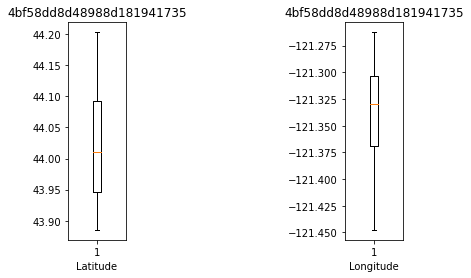

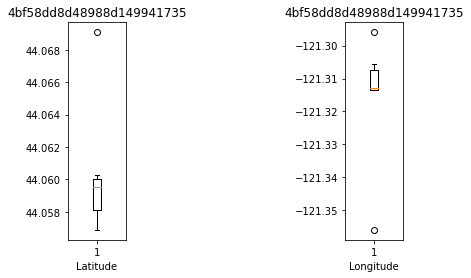

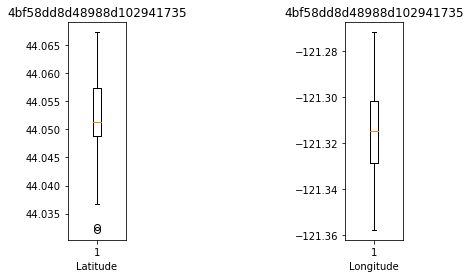

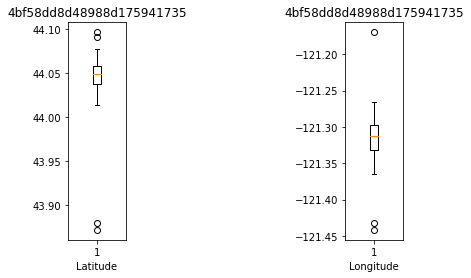

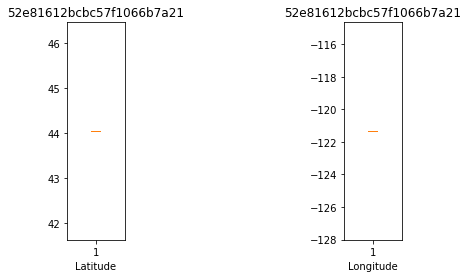

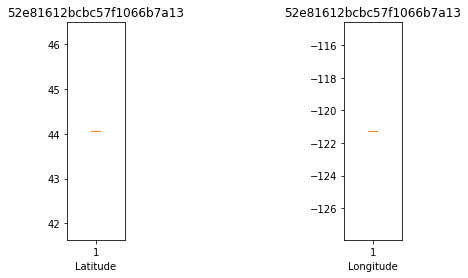

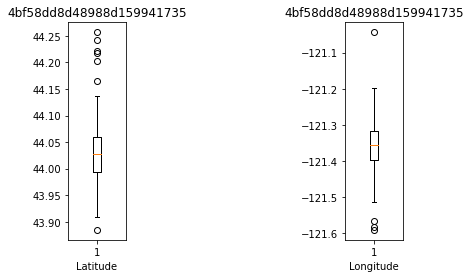

In [12]:
fnum=1

unique_cat=len(loc_venues['Category ID'].unique())
bp={}                                                   # Box plot object dict.

for i in range(0,unique_cat):
    plt.figure()
    plt.subplot(1,5,1)
    Y=loc_venues.loc[loc_venues['Category ID']==categories[i],'Venue Latitude']
    bp[categories[i]+'.Latitude']=(plt.boxplot(Y))
    plt.xlabel('Latitude')
    plt.title(str(categories[i]))

    plt.subplot(1,5,5)
    Y=loc_venues.loc[loc_venues['Category ID']==categories[i],'Venue Longitude']
    bp[categories[i]+'.Longitude']=(plt.boxplot(Y))
    plt.xlabel('Longitude')
    plt.title(str(categories[i]))

fnum=fnum+1

Remove the outliers from data, by referencing the category ID and latitude/longitude values

(105, 5)

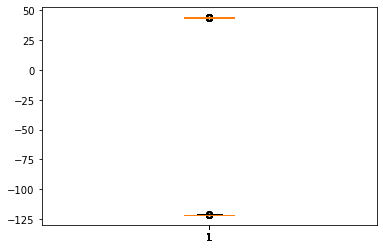

In [13]:
flag=1
while flag==1:
    flag=0
    for category in categories:
        
        Y=loc_venues.loc[loc_venues['Category ID']==category,'Venue Latitude']
        bp[category+'.Latitude']=plt.boxplot(Y)
        Y=loc_venues.loc[loc_venues['Category ID']==category,'Venue Longitude']
        bp[category+'.Longitude']=plt.boxplot(Y)
        
        outliers_lat=bp[category+'.Latitude']['fliers'][0].get_data()[1]
        outliers_long=bp[category+'.Longitude']['fliers'][0].get_data()[1]
        if len(outliers_lat)>0 or len(outliers_long)>0:
            flag=1
        for outlier_lat in outliers_lat:
            idx1=loc_venues['Category ID']==category
            idx2=loc_venues['Venue Latitude']==outlier_lat
            idx1=idx1[idx1==True].index
            idx2=idx2[idx2==True].index
            loc_venues.drop(idx1.intersection(idx2),axis=0,inplace=True)
        for outlier_long in outliers_long:
            idx1=loc_venues['Category ID']==category
            idx2=loc_venues['Venue Longitude']==outlier_long
            idx1=idx1[idx1==True].index
            idx2=idx2[idx2==True].index
            loc_venues.drop(idx1.intersection(idx2),axis=0,inplace=True)
loc_venues.shape

Re-Plot the box plots to check that there are no outliers remaining

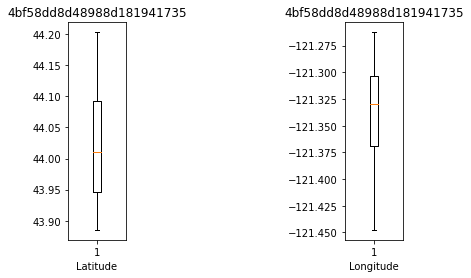

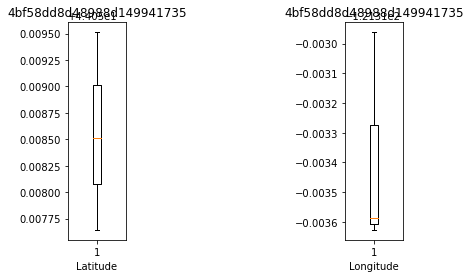

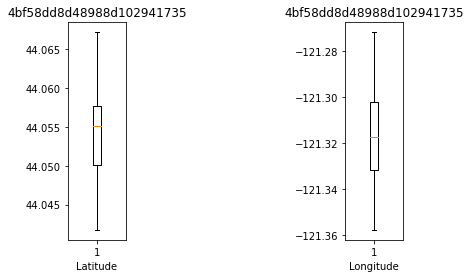

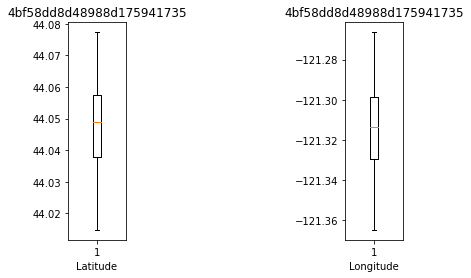

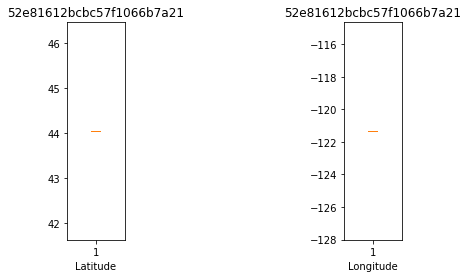

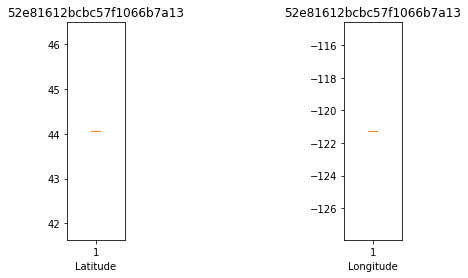

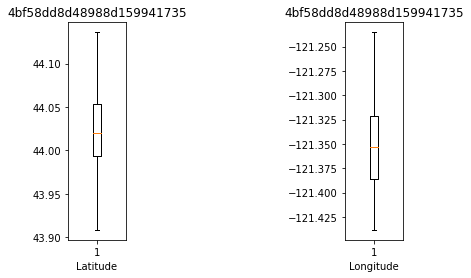

In [14]:
fnum=1

unique_cat=len(categories)
bp={}                                                   # Box plot object dict.

for i in range(0,unique_cat):
    plt.figure()
    plt.subplot(1,5,1)
    Y=loc_venues.loc[loc_venues['Category ID']==categories[i],'Venue Latitude']
    bp[categories[i]+'.Latitude']=(plt.boxplot(Y))
    plt.xlabel('Latitude')
    plt.title(str(categories[i]))

    plt.subplot(1,5,5)
    Y=loc_venues.loc[loc_venues['Category ID']==categories[i],'Venue Longitude']
    bp[categories[i]+'.Longitude']=(plt.boxplot(Y))
    plt.xlabel('Longitude')
    plt.title(str(categories[i]))

fnum=fnum+1

Re-plot the folium plot

In [15]:
maps={}
loc_results_lat=[]
loc_results_long=[]
zip_results={}

i=0
for address in addresses:
    # create map
    clustered=loc_venues[loc_venues['Address']==address]
    lat_array=clustered['Venue Latitude']
    long_array=clustered['Venue Longitude']
    venue_name=clustered.index
    
    # Calculate mean latitude and longitude
    latitude=lat_array.mean()                            
    longitude=long_array.mean()
    
    # Update results latitude and longitude arrays
    loc_results_lat.append(latitude)
    loc_results_long.append(longitude)
    
    # Obtain Zipcode
    url_zip=url_str_zip.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,500,1)
    zip_result=requests.get(url_zip).json()
    try:
        zip_results[address]=zip_result['response']['venues'][0]['location']['formattedAddress']
    except:
        zip_results[address]='0'
    
    print('Centroid for '+str(address)+' at: '+str(round(latitude,5))+', '+str(round(longitude,5))
          +', Address:',zip_results[address][0])

    map_clusters = folium.Map(location=[latitude, longitude],zoom_start=10)

    

    # add markers to the map
    markers_colors = []
    for lat, lon, name in zip(lat_array, long_array, 
                                 venue_name     ):
        label = folium.Popup(name, parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
                            ).add_to(map_clusters)

    folium.RegularPolygonMarker(location=[latitude, longitude], popup='Centroid',
                         fill_color='yellow', radius=10).add_to(map_clusters)
    maps[address]=map_clusters
    i=i+1
lat2=latitude
long2=longitude
maps[addresses[-1]]

Centroid for Bend, Oregon at: 44.03733, -121.32909, Address: Reed Market Bridge


### Geo-distance shift in coordinates

Define function to calculate distance based on geo-coordinates

In [16]:
def geodistance (coord1,coord2):
    R = 6373.0                          ## Radius of Earth in kms.
    latd1 = math.radians(coord1[0])     # Latitude of coord1 calculated in radians
    lon1 = math.radians(coord1[1])     # Longitude of coord1 calculated in radians
    latd2 = math.radians(coord2[0])     # Latitude of coord2 calculated in radians
    lon2 = math.radians(coord2[1])     # Longitude of coord2 calculated in radians

    dlon = lon2 - lon1
    dlat = latd2 - latd1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c                    # Geo-distance in kms.
    return distance

Distance shift in centroid after omitting the outliers:

In [17]:
shift_outlier=geodistance([lat1, long1],[lat2,long2])
print('Distance shift in Centroid before and after removing outliers is: '+str(round(shift_outlier,2))+'kms.' )
for i in range(0,len(addresses)):
    shift_original=geodistance([df_loc.loc[i,'Latitude'],df_loc.loc[i,'Longitude']],[lat2,long2])
    print('Distance shift in Centroid for {} before and after processing is: {}'
          .format(addresses[i],str(round(shift_original,2))+'kms.'))
    

Distance shift in Centroid before and after removing outliers is: 0.63kms.
Distance shift in Centroid for Bend, Oregon before and after processing is: 2.78kms.


## Encoding and Clustering

### Encoding by user specified category

In [18]:
# one hot encoding
loc_encoded=pd.get_dummies(loc_venues[['Category ID']], prefix="", prefix_sep="")   # Dataframe of encoding
loc_venues_encoded=pd.concat([loc_venues,loc_encoded],axis=1)                       # Encoded dataframe with venue details
loc_venues_encoded.head()

,Address,Venue Latitude,Venue Longitude,Venue Category,Category ID,4bf58dd8d48988d102941735,4bf58dd8d48988d149941735,4bf58dd8d48988d159941735,4bf58dd8d48988d175941735,4bf58dd8d48988d181941735,52e81612bcbc57f1066b7a13,52e81612bcbc57f1066b7a21
Venue,,,,,,,,,,,,
Des Chutes Historical Museum,"Bend, Oregon",44.055381,-121.316909,History Museum,4bf58dd8d48988d181941735,0,0,0,0,1,0,0
Sunriver Observatory,"Bend, Oregon",43.885204,-121.447711,Science Museum,4bf58dd8d48988d181941735,0,0,0,0,1,0,0
Petersen Rock Museum,"Bend, Oregon",44.203122,-121.262437,Public Art,4bf58dd8d48988d181941735,0,0,0,0,1,0,0
High Desert Museum,"Bend, Oregon",43.966331,-121.343029,Museum,4bf58dd8d48988d181941735,0,0,0,0,1,0,0
Toomie's,"Bend, Oregon",44.058513,-121.313588,Thai Restaurant,4bf58dd8d48988d149941735,0,1,0,0,0,0,0


### Clustering by category encoding

In [19]:
# set number of clusters
kclusters = len(categories)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(loc_encoded)
# check cluster labels generated for each row in the dataframe
(kmeans.labels_)
# add clustering labels
loc_venues_clustered=loc_venues_encoded
loc_venues_clustered['Cluster Labels']= kmeans.labels_

# Display clustered dataframe
loc_venues_clustered.head(2)

,Address,Venue Latitude,Venue Longitude,Venue Category,Category ID,4bf58dd8d48988d102941735,4bf58dd8d48988d149941735,4bf58dd8d48988d159941735,4bf58dd8d48988d175941735,4bf58dd8d48988d181941735,52e81612bcbc57f1066b7a13,52e81612bcbc57f1066b7a21,Cluster Labels
Venue,,,,,,,,,,,,,
Des Chutes Historical Museum,"Bend, Oregon",44.055381,-121.316909,History Museum,4bf58dd8d48988d181941735,0,0,0,0,1,0,0,3
Sunriver Observatory,"Bend, Oregon",43.885204,-121.447711,Science Museum,4bf58dd8d48988d181941735,0,0,0,0,1,0,0,3


## Display Results

### Generate analyzed map array for each address using folium, and display centroid location for each address

In [20]:
maps={}
loc_results_lat=[]
loc_results_long=[]
zip_results={}

i=0
for address in addresses:
    # create map
    clustered=loc_venues_clustered[loc_venues_clustered['Address']==address]
    lat_array=clustered['Venue Latitude']
    long_array=clustered['Venue Longitude']
    
    # Calculate mean latitude and longitude
    latitude=lat_array.mean()                            
    longitude=long_array.mean()
    
    # Update results latitude and longitude arrays
    loc_results_lat.append(latitude)
    loc_results_long.append(longitude)
    
    # Obtain Zipcode
    url_zip=url_str_zip.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,500,1)
    zip_result=requests.get(url_zip).json()
    try:
        zip_results[address]=zip_result['response']['venues'][0]['location']['formattedAddress']
    except:
        zip_results[address]='0'
    
    print('Centroid for '+str(address)+' at: '+str(round(latitude,5))+', '+str(round(longitude,5))
          +', Address:',zip_results[address][0])

    map_clusters = folium.Map(location=[latitude, longitude],zoom_start=10)

    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [j + x + (j*x)**2 for j in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(j) for j in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster, category in zip(lat_array, long_array, 
                                      clustered.index, clustered['Cluster Labels'], clustered['Category ID']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(category), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7,
                            ).add_to(map_clusters)

    folium.RegularPolygonMarker(location=[latitude, longitude], popup='Centroid',
                         fill_color='yellow', radius=10).add_to(map_clusters)
    maps[address]=map_clusters
    i=i+1

Centroid for Bend, Oregon at: 44.03733, -121.32909, Address: Reed Market Bridge


### Plot map

In [21]:
maps[addresses[-1]]